In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import data_reading, music_generation
from models import music_generation_VAE
from dataset import iterable_dataset
import os
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt
from models import feature_prediction_gru

In [3]:
PROJECT_DIR ="D:/522 project"
PPR_DIR = "lpd_5_pianoroll"
PATH = os.path.join(PROJECT_DIR, PPR_DIR)

In [8]:
GUITAR_VAE= "./saved_model_and_data/vae/vae_guitar/G_vae_trained_r12s48d27e20"
PIANO_VAE = "./saved_model_and_data/vae/vae_piano/P_vae_trained_r12s48d25e20"
DRUMS_VAE = "./saved_model_and_data/vae/vae_drums/D_vae_trained_r12s48d25e20"
BASS_VAE = "./saved_model_and_data/vae/vae_bass/B_vae_trained_r12s48d26e20"
STRINGS_VAE ="./saved_model_and_data/vae/vae_strings/S_vae_trained_r12s48d26e20"

In [9]:
GUITAR_LEARNER = "./saved_model_and_data/learner/guitar_based_on_piano/guitar_learner_epoch80"
PIANO_PREDICTOR = "./saved_model_and_data/learner/piano_next/latent_learner_gru_piano_100"
STRINGS_LEARNER = "./saved_model_and_data/learner/strings_based_on_piano/string_learner_epoch60"
DRUMS_LEARNER = "./saved_model_and_data/learner/drums_based_on_piano/drums_learner_epoch80"
BASS_LEARNER = "./saved_model_and_data/learner/bass_based_on_piano/bass_learner_epoch80"

In [10]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
LEARNER_HIDDEN_SIZE = 512
VAE_HIDDEN_SIZE = 512
N_LAYERS = 3
BATCH_SIZE=64

In [11]:
guitar_learner = feature_prediction_gru.FeaturePredictionGRU(["Guitar"], VAE_HIDDEN_SIZE+1, 
                                                             LEARNER_HIDDEN_SIZE, BATCH_SIZE, N_LAYERS, DEVICE).to(DEVICE)
guitar_vae = music_generation_VAE.ConvVAE(["Guitar"], VAE_HIDDEN_SIZE)
guitar_learner.load_state_dict(torch.load(GUITAR_LEARNER))
guitar_learner.to(DEVICE)
guitar_vae.load_state_dict(torch.load(GUITAR_VAE))
guitar_vae.to(DEVICE)

ConvVAE(
  (enc_conv1): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2))
  (enc_conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (enc_conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2))
  (enc_conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2))
  (trans_enc_lin1): Linear(in_features=7168, out_features=512, bias=True)
  (trans_enc_lin2): Linear(in_features=512, out_features=256, bias=True)
  (trans_enc_lin3): Linear(in_features=256, out_features=513, bias=True)
  (trans_dec1): Linear(in_features=512, out_features=256, bias=True)
  (trans_dec2): Linear(in_features=256, out_features=512, bias=True)
  (trans_dec3): Linear(in_features=512, out_features=7168, bias=True)
  (dec_conv1): ConvTranspose2d(512, 256, kernel_size=(3, 3), stride=(2, 2))
  (dec_conv2): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2))
  (dec_conv3): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2))
  (dec_conv4): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2))

In [12]:
piano_predictor = feature_prediction_gru.FeaturePredictionGRU(["Piano"], VAE_HIDDEN_SIZE+1, 
                                                             LEARNER_HIDDEN_SIZE, BATCH_SIZE, N_LAYERS, DEVICE).to(DEVICE)
piano_vae = music_generation_VAE.ConvVAE(["Piano"], VAE_HIDDEN_SIZE)
piano_predictor.load_state_dict(torch.load(PIANO_PREDICTOR))
piano_predictor.to(DEVICE)
piano_vae.load_state_dict(torch.load(PIANO_VAE))
piano_vae.to(DEVICE)

ConvVAE(
  (enc_conv1): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2))
  (enc_conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (enc_conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2))
  (enc_conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2))
  (trans_enc_lin1): Linear(in_features=7168, out_features=512, bias=True)
  (trans_enc_lin2): Linear(in_features=512, out_features=256, bias=True)
  (trans_enc_lin3): Linear(in_features=256, out_features=513, bias=True)
  (trans_dec1): Linear(in_features=512, out_features=256, bias=True)
  (trans_dec2): Linear(in_features=256, out_features=512, bias=True)
  (trans_dec3): Linear(in_features=512, out_features=7168, bias=True)
  (dec_conv1): ConvTranspose2d(512, 256, kernel_size=(3, 3), stride=(2, 2))
  (dec_conv2): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2))
  (dec_conv3): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2))
  (dec_conv4): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2))

In [13]:
strings_learner = feature_prediction_gru.FeaturePredictionGRU(["Strings"], VAE_HIDDEN_SIZE+1, 
                                                             LEARNER_HIDDEN_SIZE, BATCH_SIZE, N_LAYERS, DEVICE).to(DEVICE)
strings_vae = music_generation_VAE.ConvVAE(["Strings"], VAE_HIDDEN_SIZE)
strings_learner.load_state_dict(torch.load(STRINGS_LEARNER))
strings_learner.to(DEVICE)
strings_vae.load_state_dict(torch.load(STRINGS_VAE))
strings_vae.to(DEVICE)

ConvVAE(
  (enc_conv1): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2))
  (enc_conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (enc_conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2))
  (enc_conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2))
  (trans_enc_lin1): Linear(in_features=7168, out_features=512, bias=True)
  (trans_enc_lin2): Linear(in_features=512, out_features=256, bias=True)
  (trans_enc_lin3): Linear(in_features=256, out_features=513, bias=True)
  (trans_dec1): Linear(in_features=512, out_features=256, bias=True)
  (trans_dec2): Linear(in_features=256, out_features=512, bias=True)
  (trans_dec3): Linear(in_features=512, out_features=7168, bias=True)
  (dec_conv1): ConvTranspose2d(512, 256, kernel_size=(3, 3), stride=(2, 2))
  (dec_conv2): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2))
  (dec_conv3): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2))
  (dec_conv4): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2))

In [14]:
bass_learner = feature_prediction_gru.FeaturePredictionGRU(["Bass"], VAE_HIDDEN_SIZE+1, 
                                                             LEARNER_HIDDEN_SIZE, BATCH_SIZE, N_LAYERS, DEVICE).to(DEVICE)
bass_vae = music_generation_VAE.ConvVAE(["Bass"], VAE_HIDDEN_SIZE)
bass_learner.load_state_dict(torch.load(BASS_LEARNER))
bass_learner.to(DEVICE)
bass_vae.load_state_dict(torch.load(BASS_VAE))
bass_vae.to(DEVICE)

ConvVAE(
  (enc_conv1): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2))
  (enc_conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (enc_conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2))
  (enc_conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2))
  (trans_enc_lin1): Linear(in_features=7168, out_features=512, bias=True)
  (trans_enc_lin2): Linear(in_features=512, out_features=256, bias=True)
  (trans_enc_lin3): Linear(in_features=256, out_features=513, bias=True)
  (trans_dec1): Linear(in_features=512, out_features=256, bias=True)
  (trans_dec2): Linear(in_features=256, out_features=512, bias=True)
  (trans_dec3): Linear(in_features=512, out_features=7168, bias=True)
  (dec_conv1): ConvTranspose2d(512, 256, kernel_size=(3, 3), stride=(2, 2))
  (dec_conv2): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2))
  (dec_conv3): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2))
  (dec_conv4): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2))

In [15]:
drums_learner = feature_prediction_gru.FeaturePredictionGRU(["Drums"], VAE_HIDDEN_SIZE+1, 
                                                             LEARNER_HIDDEN_SIZE, BATCH_SIZE, N_LAYERS, DEVICE).to(DEVICE)
drums_vae = music_generation_VAE.ConvVAE(["Drums"], VAE_HIDDEN_SIZE)
drums_learner.load_state_dict(torch.load(DRUMS_LEARNER))
drums_learner.to(DEVICE)
drums_vae.load_state_dict(torch.load(DRUMS_VAE))
drums_vae.to(DEVICE)

ConvVAE(
  (enc_conv1): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2))
  (enc_conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (enc_conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2))
  (enc_conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2))
  (trans_enc_lin1): Linear(in_features=7168, out_features=512, bias=True)
  (trans_enc_lin2): Linear(in_features=512, out_features=256, bias=True)
  (trans_enc_lin3): Linear(in_features=256, out_features=513, bias=True)
  (trans_dec1): Linear(in_features=512, out_features=256, bias=True)
  (trans_dec2): Linear(in_features=256, out_features=512, bias=True)
  (trans_dec3): Linear(in_features=512, out_features=7168, bias=True)
  (dec_conv1): ConvTranspose2d(512, 256, kernel_size=(3, 3), stride=(2, 2))
  (dec_conv2): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2))
  (dec_conv3): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2))
  (dec_conv4): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2))

In [16]:
TEST_FILE_NUMBER = 30
SEQ_LEN = 48
RESOLUTION = 12
REQUIRED_INSTRUMENTS = ["Drums", "Piano", "Guitar", "Bass", "Strings"]
all_files_list = data_reading.read_all_npzs(PATH, shuffle=True)
all_files_list = all_files_list[:TEST_FILE_NUMBER]


In [17]:
test_pianorolls = data_reading.read_and_preprocess_and_filter_pianorolls(all_files_list, REQUIRED_INSTRUMENTS, SEQ_LEN,
                                                           RESOLUTION, False)

In [18]:
len(test_pianorolls)

15

In [33]:
sample = test_pianorolls[11]

In [34]:
sample_tensor = sample.stack()

In [35]:
sample_tensor.shape

(5, 4992, 128)

[<AxesSubplot:xlabel='time (beat)', ylabel='Drums\n\npitch'>,
 <AxesSubplot:xlabel='time (beat)', ylabel='Piano\n\npitch'>,
 <AxesSubplot:xlabel='time (beat)', ylabel='Guitar\n\npitch'>,
 <AxesSubplot:xlabel='time (beat)', ylabel='Bass\n\npitch'>,
 <AxesSubplot:xlabel='time (beat)', ylabel='Strings\n\npitch'>]

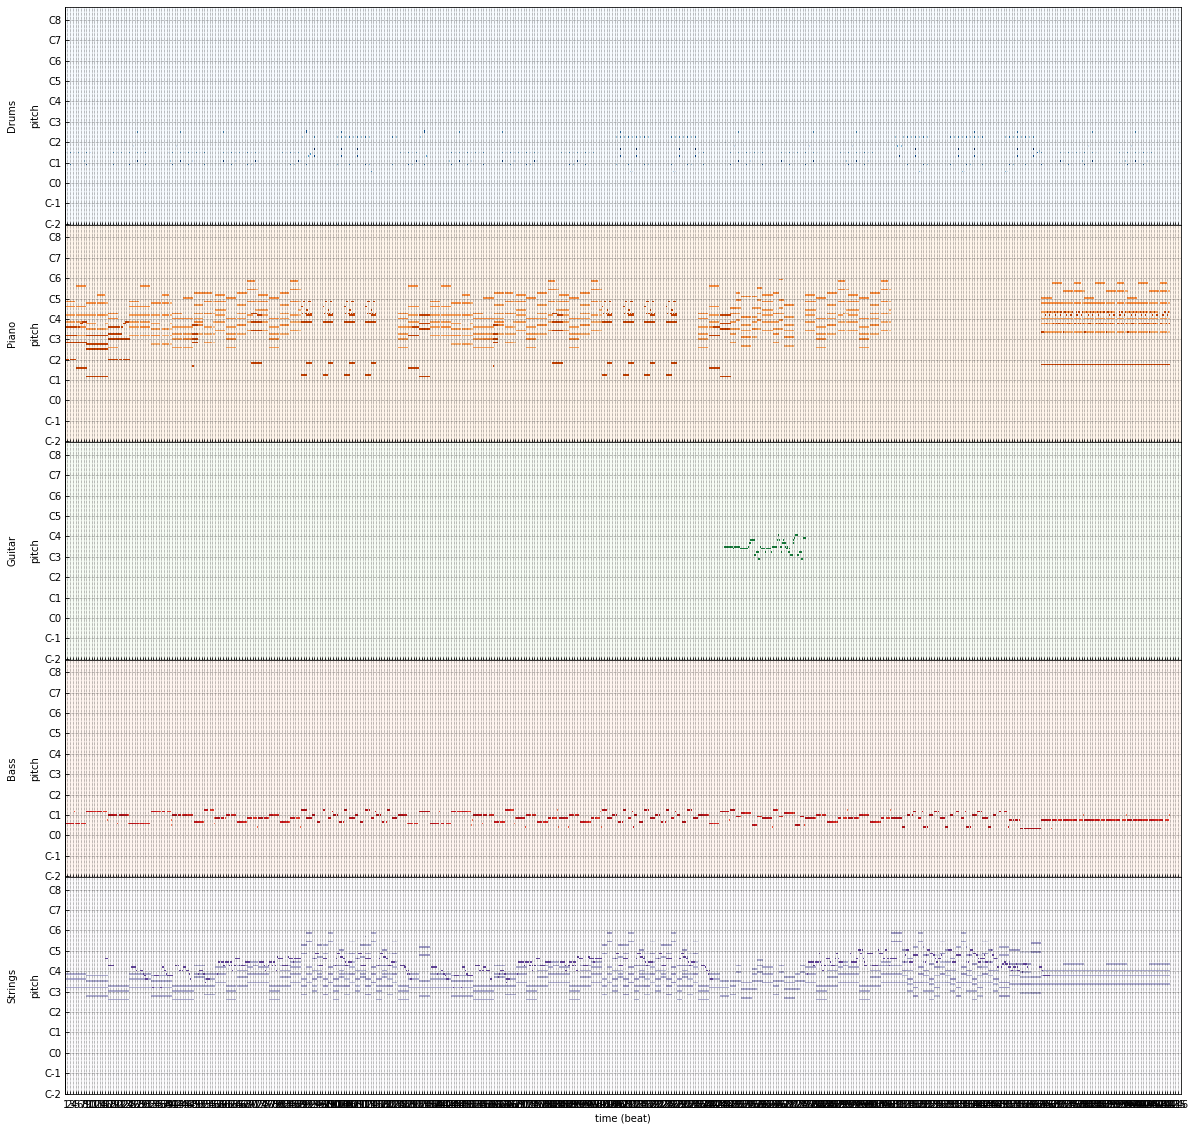

In [36]:
plt.rcParams["figure.figsize"] = (20,20)
sample.plot()

In [37]:
start_position = 300
piano_first_window = sample_tensor[1:2, start_position:start_position+SEQ_LEN]
piano_first_window = torch.from_numpy(piano_first_window[np.newaxis,:]).to(DEVICE).float()
piano_second_window = sample_tensor[1:2, start_position+SEQ_LEN:start_position+2*SEQ_LEN]
piano_second_window = torch.from_numpy(piano_second_window[np.newaxis,:]).to(DEVICE).float()

In [38]:
piano_vae.eval()
piano_first_feature = piano_vae.encode(piano_first_window)
piano_second_feature = piano_vae.encode(piano_second_window)

In [39]:
(piano_first_feature - piano_second_feature).sum()

tensor(-3.8830, device='cuda:0', grad_fn=<SumBackward0>)

In [40]:
piano_first_feature.shape

torch.Size([1, 513])

In [41]:
hidden = piano_predictor.init_hidden(1)
piano_predictor.eval()
output1, hidden = piano_predictor(piano_first_feature.reshape(1,1,1,VAE_HIDDEN_SIZE+1), hidden)
output2, hidden = piano_predictor(piano_second_feature.reshape(1,1,1,VAE_HIDDEN_SIZE+1), hidden)

In [42]:
GENERATE_FRAME = 40
piano_features = []
bass_features = []
drums_features = []
strings_features = []
guitar_features = []
output = output2
for i in range(GENERATE_FRAME):
    output, hidden = piano_predictor(output, hidden)
    piano_features.append(output)
    bass_features.append

In [43]:
generated_frames_list = []
for feature in piano_features:
    feature = feature.reshape(1, VAE_HIDDEN_SIZE+1)
    point = music_generation_VAE.rsample(feature, 1)
    recovered = piano_vae.decode(point)
    generated_frames_list.append(recovered)

In [44]:
generated_frames_list[0].shape

torch.Size([1, 1, 1, 48, 128])

In [45]:
generated_piano_tensor = torch.cat(generated_frames_list, 3).squeeze()

In [46]:
generated_piano_tensor.shape

torch.Size([1920, 128])

Piano mean:  tensor(0.2109, device='cuda:0', grad_fn=<MeanBackward0>)


[<AxesSubplot:xlabel='time (beat)', ylabel='Piano\n\npitch'>]

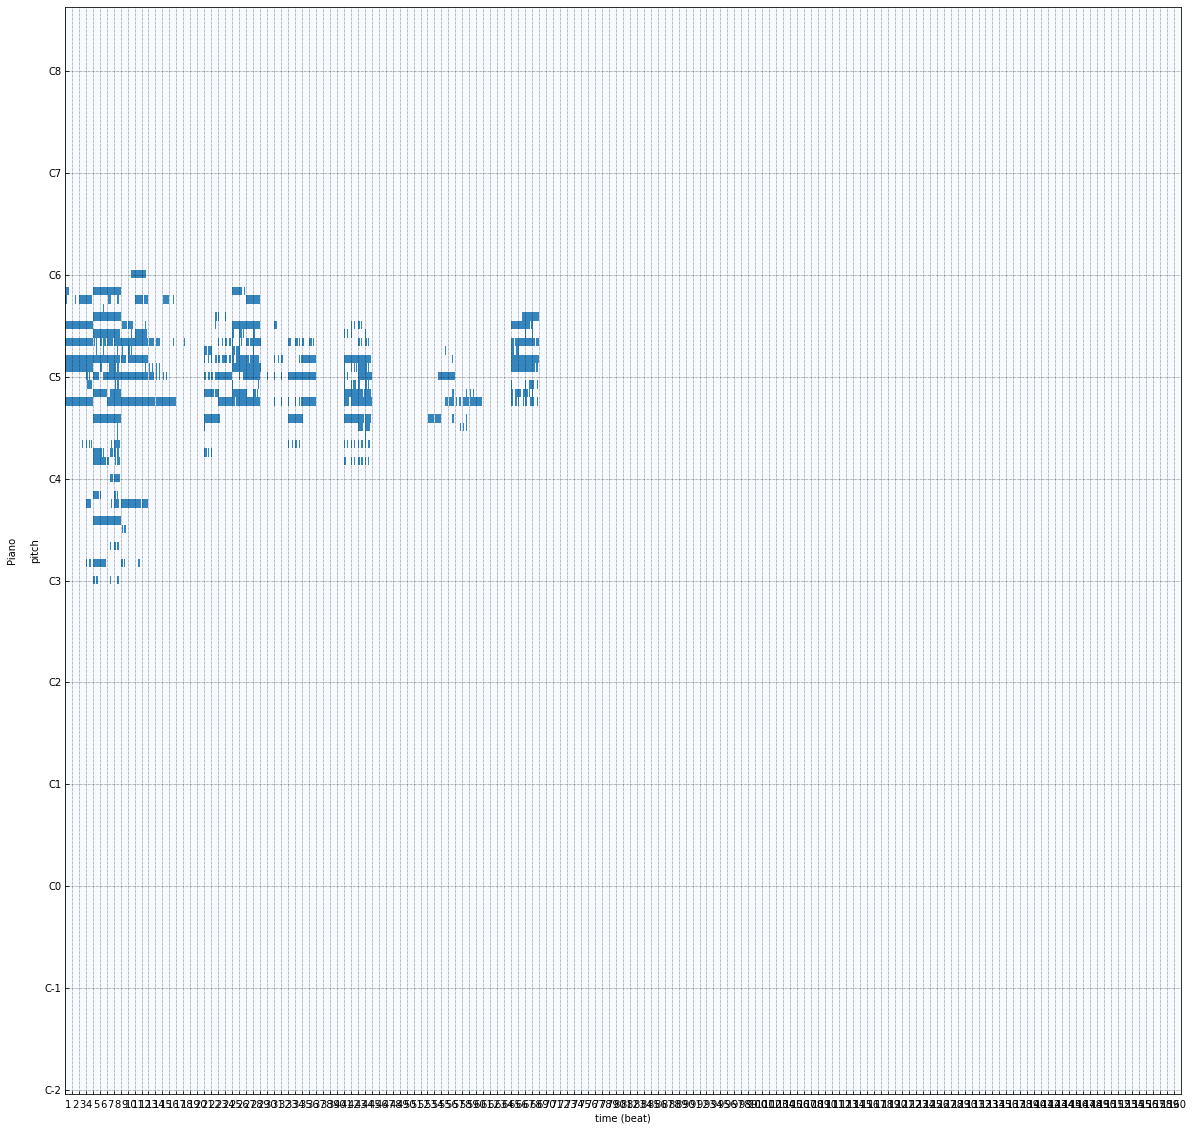

In [75]:
generated_piano_dict = music_generation.create_tracks_dict_from_tensor(generated_piano_tensor.unsqueeze(0), ["Piano"])
generated_piano_dict = music_generation.binarize_generated_music_dict(generated_piano_dict, {"Piano":4}, False)
generated_piano_music = music_generation.create_multitrack(generated_piano_dict, RESOLUTION)
generated_piano_music.plot()

In [52]:
#now for other instruments: bass
hidden = bass_learner.init_hidden(1)
bass_learner.eval()
output1, hidden = bass_learner(piano_first_feature.reshape(1,1,1,VAE_HIDDEN_SIZE+1), hidden)
output2, hidden = bass_learner(piano_second_feature.reshape(1,1,1,VAE_HIDDEN_SIZE+1), hidden)
output = output2
bass_features = []
generated_bass_frames = []
for i in range(GENERATE_FRAME):
    output, hidden = bass_learner(output, hidden)
    bass_features.append(output)
for bass_feature in bass_features:
    bass_feature = bass_feature.reshape(1, VAE_HIDDEN_SIZE+1)
    point = music_generation_VAE.rsample(feature, 1)
    recovered = bass_vae.decode(point)
    generated_bass_frames.append(recovered)
generated_bass_tensor = torch.cat(generated_bass_frames, 3).squeeze()

Bass mean:  tensor(0.0553, device='cuda:0', grad_fn=<MeanBackward0>)


[<AxesSubplot:xlabel='time (beat)', ylabel='Bass\n\npitch'>]

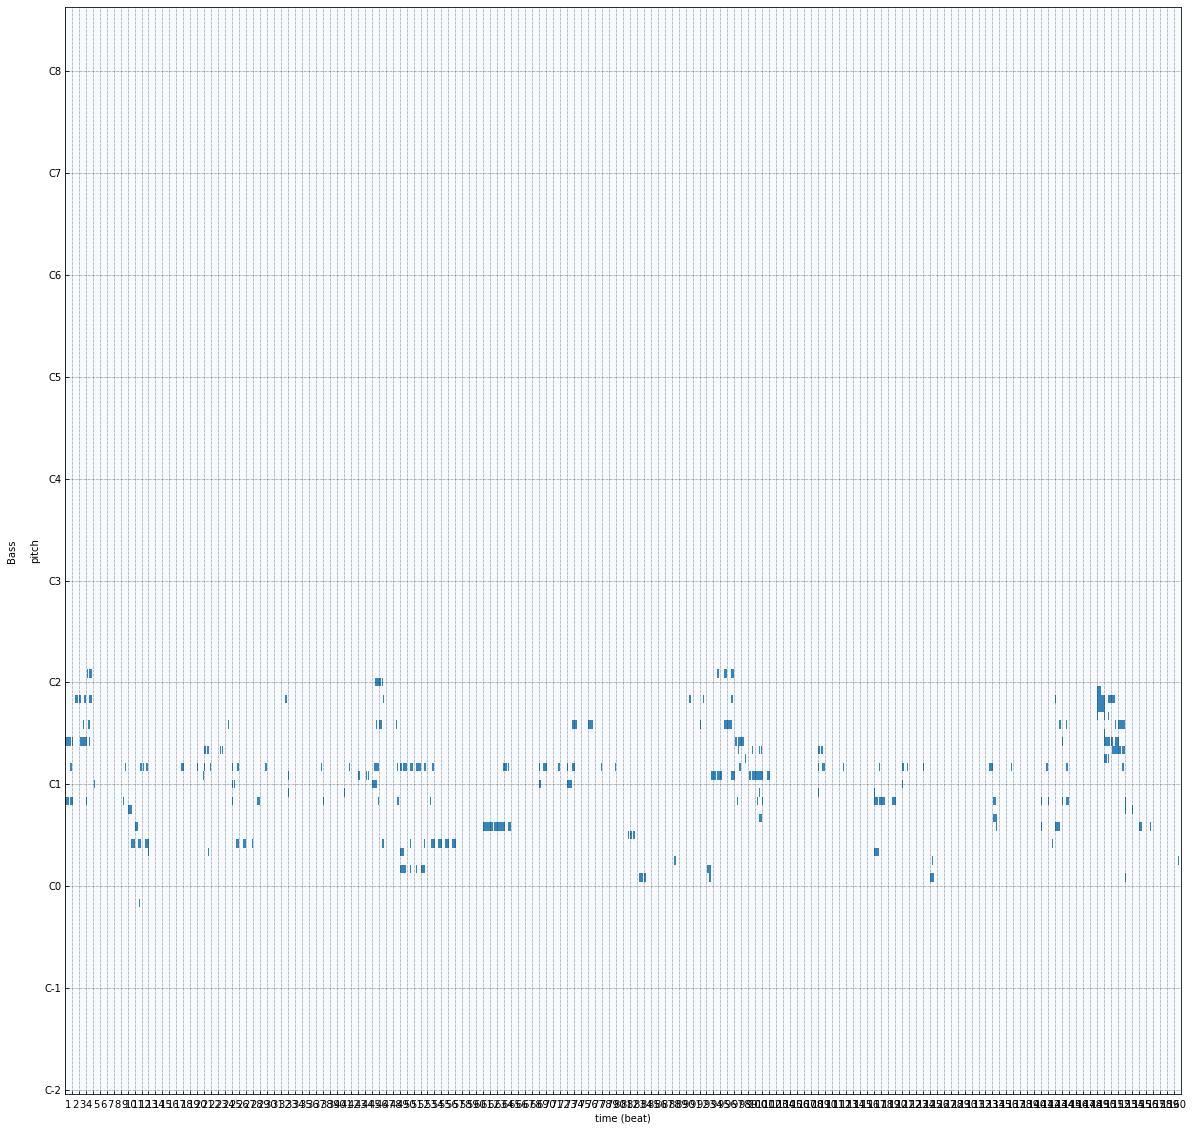

In [55]:
generated_bass_dict = music_generation.create_tracks_dict_from_tensor(generated_bass_tensor.unsqueeze(0), ["Bass"])
generated_bass_dict = music_generation.binarize_generated_music_dict(generated_bass_dict, {"Bass":4}, False)
generated_bass_music = music_generation.create_multitrack(generated_bass_dict, RESOLUTION)
generated_bass_music.plot()

In [56]:
#now for other instruments: strings
hidden = strings_learner.init_hidden(1)
strings_learner.eval()
output1, hidden = strings_learner(piano_first_feature.reshape(1,1,1,VAE_HIDDEN_SIZE+1), hidden)
output2, hidden = strings_learner(piano_second_feature.reshape(1,1,1,VAE_HIDDEN_SIZE+1), hidden)
output = output2
strings_features = []
generated_strings_frames = []
for i in range(GENERATE_FRAME):
    output, hidden = strings_learner(output, hidden)
    strings_features.append(output)
for strings_feature in strings_features:
    strings_feature = strings_feature.reshape(1, VAE_HIDDEN_SIZE+1)
    point = music_generation_VAE.rsample(feature, 1)
    recovered = strings_vae.decode(point)
    generated_strings_frames.append(recovered)
generated_strings_tensor = torch.cat(generated_strings_frames, 3).squeeze()

Strings mean:  tensor(0.5470, device='cuda:0', grad_fn=<MeanBackward0>)


[<AxesSubplot:xlabel='time (beat)', ylabel='Strings\n\npitch'>]

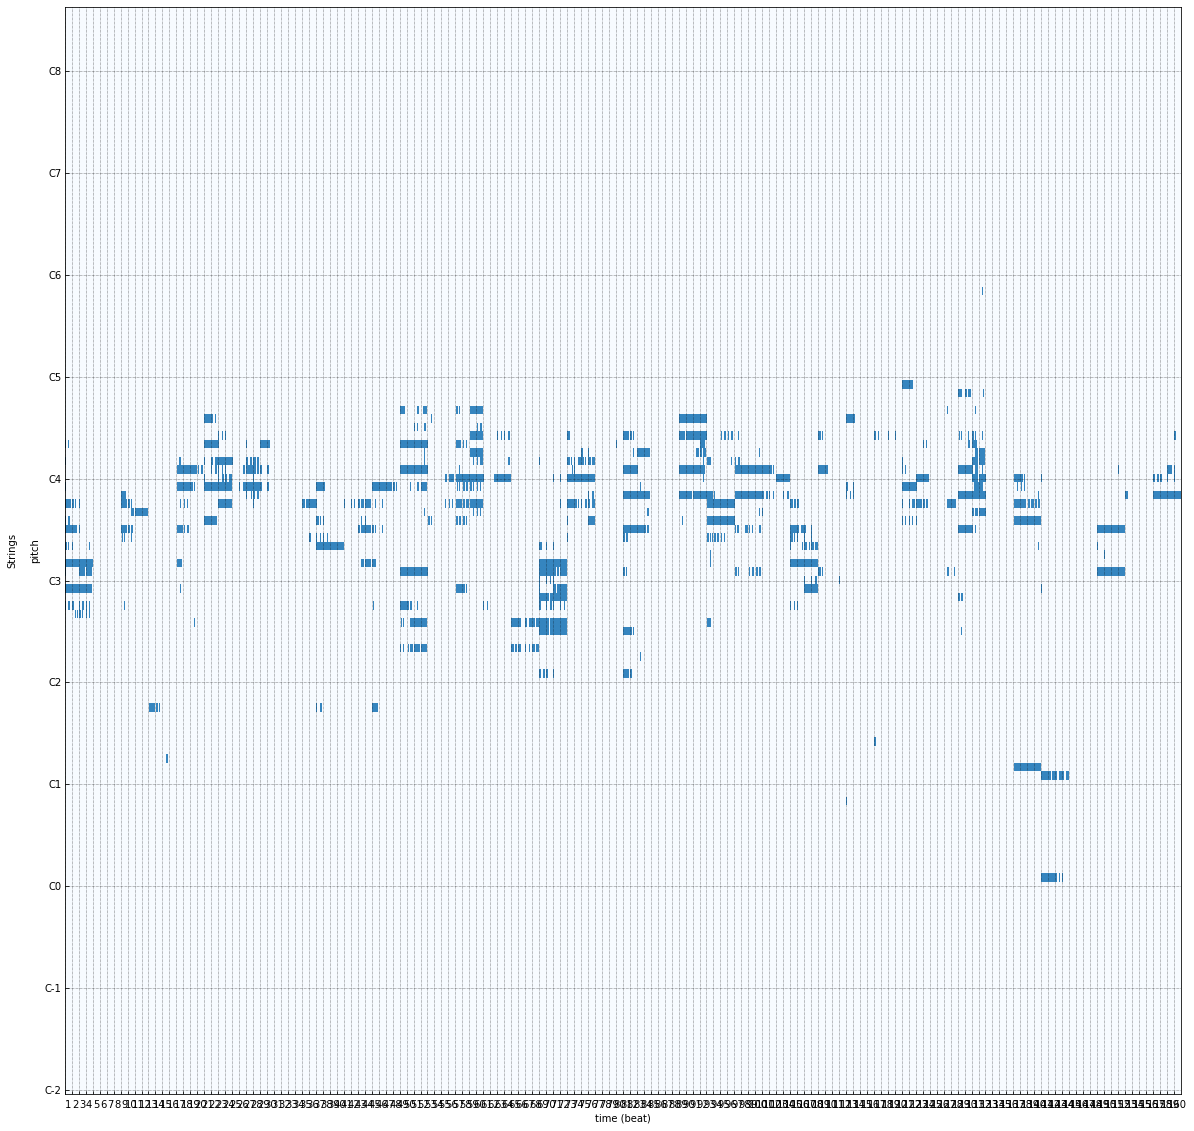

In [77]:
generated_strings_dict = music_generation.create_tracks_dict_from_tensor(generated_strings_tensor.unsqueeze(0), ["Strings"])
generated_strings_dict = music_generation.binarize_generated_music_dict(generated_strings_dict, {"Strings":6}, False)
generated_strings_music = music_generation.create_multitrack(generated_strings_dict, RESOLUTION)
generated_strings_music.plot()

In [59]:
#now for other instruments: drums
hidden = drums_learner.init_hidden(1)
drums_learner.eval()
output1, hidden = drums_learner(piano_first_feature.reshape(1,1,1,VAE_HIDDEN_SIZE+1), hidden)
output2, hidden = drums_learner(piano_second_feature.reshape(1,1,1,VAE_HIDDEN_SIZE+1), hidden)
output = output2
drums_features = []
generated_drums_frames = []
for i in range(GENERATE_FRAME):
    output, hidden = drums_learner(output, hidden)
    drums_features.append(output)
for drums_feature in drums_features:
    drums_feature = drums_feature.reshape(1, VAE_HIDDEN_SIZE+1)
    point = music_generation_VAE.rsample(feature, 1)
    recovered = drums_vae.decode(point)
    generated_drums_frames.append(recovered)
generated_drums_tensor = torch.cat(generated_drums_frames, 3).squeeze()

Drums mean:  tensor(0.0676, device='cuda:0', grad_fn=<MeanBackward0>)


[<AxesSubplot:xlabel='time (beat)', ylabel='Drums\n\npitch'>]

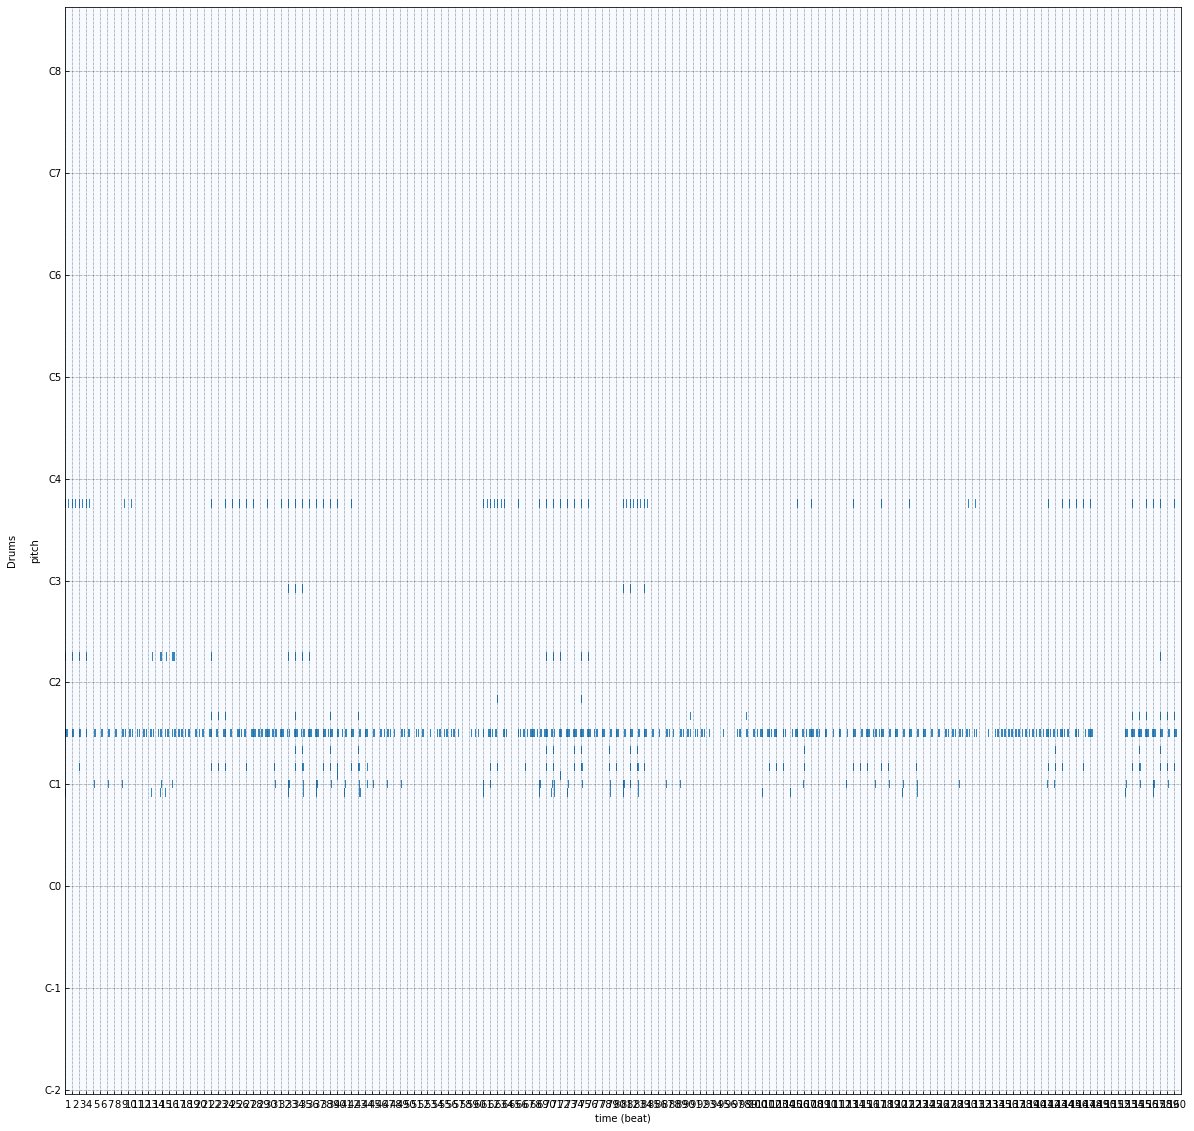

In [64]:
generated_drums_dict = music_generation.create_tracks_dict_from_tensor(generated_drums_tensor.unsqueeze(0), ["Drums"])
generated_drums_dict = music_generation.binarize_generated_music_dict(generated_drums_dict, {"Drums":3}, False)
generated_drums_music = music_generation.create_multitrack(generated_drums_dict, RESOLUTION)
generated_drums_music.plot()

In [65]:
#now for other instruments: guitar
hidden = guitar_learner.init_hidden(1)
guitar_learner.eval()
output1, hidden = guitar_learner(piano_first_feature.reshape(1,1,1,VAE_HIDDEN_SIZE+1), hidden)
output2, hidden = guitar_learner(piano_second_feature.reshape(1,1,1,VAE_HIDDEN_SIZE+1), hidden)
output = output2
guitar_features = []
generated_guitar_frames = []
for i in range(GENERATE_FRAME):
    output, hidden = guitar_learner(output, hidden)
    guitar_features.append(output)
for guitar_feature in guitar_features:
    guitar_feature = guitar_feature.reshape(1, VAE_HIDDEN_SIZE+1)
    point = music_generation_VAE.rsample(feature, 1)
    recovered = guitar_vae.decode(point)
    generated_guitar_frames.append(recovered)
generated_guitar_tensor = torch.cat(generated_guitar_frames, 3).squeeze()

Guitar mean:  tensor(0.8335, device='cuda:0', grad_fn=<MeanBackward0>)


[<AxesSubplot:xlabel='time (beat)', ylabel='Guitar\n\npitch'>]

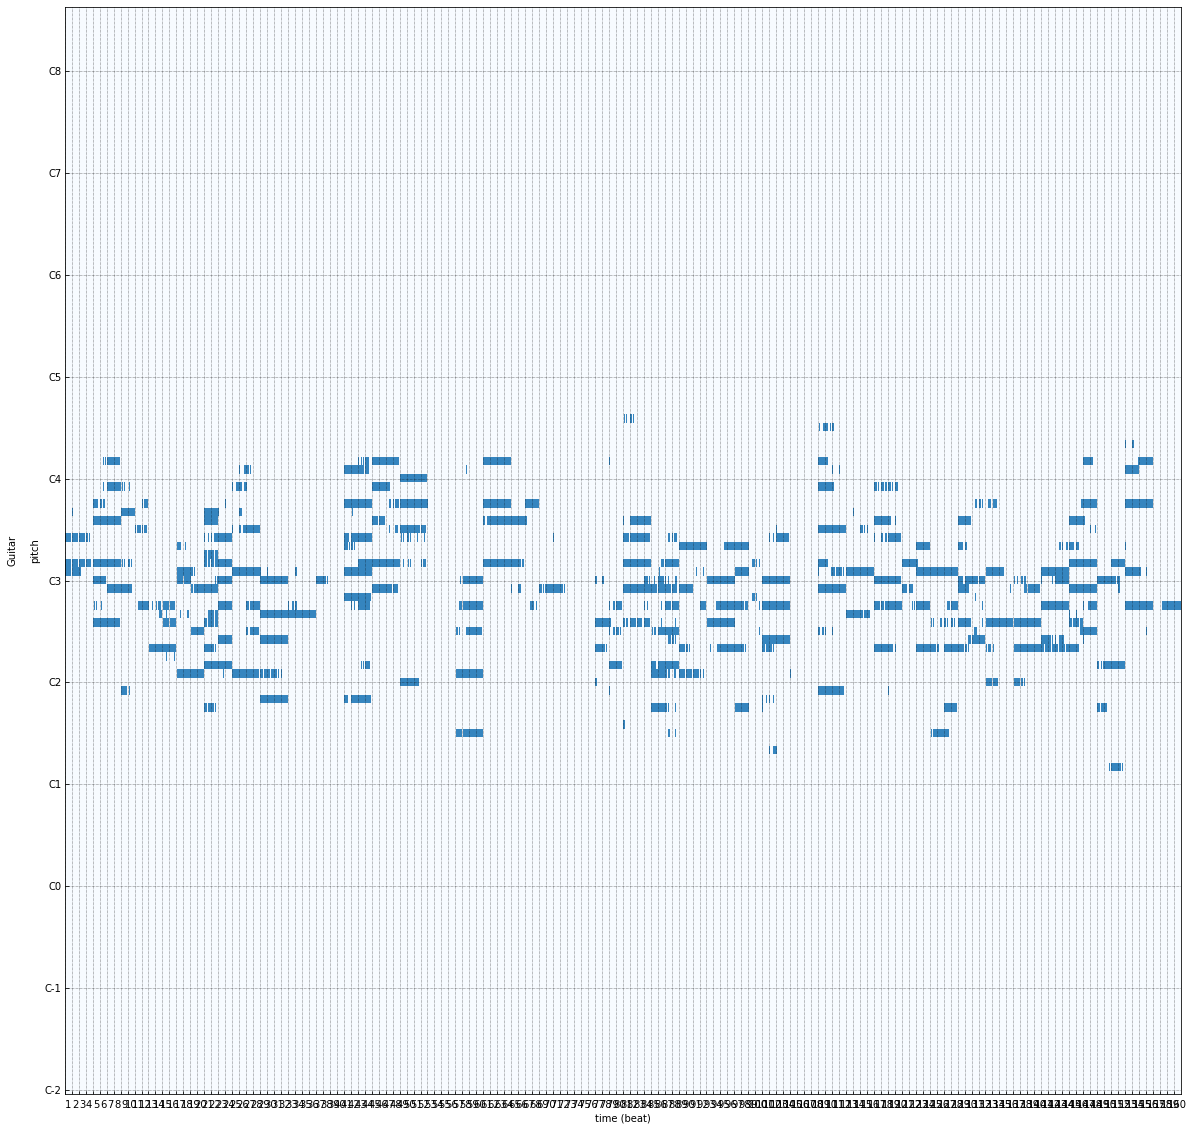

In [70]:
generated_guitar_dict = music_generation.create_tracks_dict_from_tensor(generated_guitar_tensor.unsqueeze(0), ["Guitar"])
generated_guitar_dict = music_generation.binarize_generated_music_dict(generated_guitar_dict, {"Guitar":8}, False)
generated_guitar_music = music_generation.create_multitrack(generated_guitar_dict, RESOLUTION)
generated_guitar_music.plot()

In [71]:
generated_drums_tensor.shape

torch.Size([1920, 128])

In [72]:
generated_piano_tensor.shape

torch.Size([1920, 128])

In [73]:
generated_bass_tensor.mean()

tensor(0.0553, device='cuda:0', grad_fn=<MeanBackward0>)

In [117]:
generated_strings_tensor.shape

torch.Size([1920, 128])

In [79]:
new_music_tensor = torch.stack([generated_drums_tensor, generated_piano_tensor, generated_guitar_tensor,
                                generated_bass_tensor,generated_strings_tensor ])

In [82]:
cut_off_p_dict = {"Piano":4, "Guitar":8 ,"Drums":3, "Strings":6, "Bass":4}
generated_music_dict = music_generation.create_tracks_dict_from_tensor(new_music_tensor, ["Drums","Piano","Guitar",
                                                                                                             "Bass", "Strings"])
generated_music_dict = music_generation.binarize_generated_music_dict(generated_music_dict, cut_off_p_dict, False)
generated_music = music_generation.create_multitrack(generated_music_dict, RESOLUTION)

Drums mean:  tensor(0.0676, device='cuda:0', grad_fn=<MeanBackward0>)
Piano mean:  tensor(0.2109, device='cuda:0', grad_fn=<MeanBackward0>)
Guitar mean:  tensor(0.8335, device='cuda:0', grad_fn=<MeanBackward0>)
Bass mean:  tensor(0.0553, device='cuda:0', grad_fn=<MeanBackward0>)
Strings mean:  tensor(0.5470, device='cuda:0', grad_fn=<MeanBackward0>)


In [83]:
generated_music

Multitrack(name='Generated', resolution=12, tracks=[StandardTrack(name='Drums', program=0, is_drum=True, pianoroll=array(shape=(1920, 128), dtype=uint8)), StandardTrack(name='Piano', program=0, is_drum=False, pianoroll=array(shape=(1920, 128), dtype=uint8)), StandardTrack(name='Guitar', program=24, is_drum=False, pianoroll=array(shape=(1920, 128), dtype=uint8)), StandardTrack(name='Bass', program=32, is_drum=False, pianoroll=array(shape=(1920, 128), dtype=uint8)), StandardTrack(name='Strings', program=48, is_drum=False, pianoroll=array(shape=(1920, 128), dtype=uint8))])

[<AxesSubplot:xlabel='time (beat)', ylabel='Drums\n\npitch'>,
 <AxesSubplot:xlabel='time (beat)', ylabel='Piano\n\npitch'>,
 <AxesSubplot:xlabel='time (beat)', ylabel='Guitar\n\npitch'>,
 <AxesSubplot:xlabel='time (beat)', ylabel='Bass\n\npitch'>,
 <AxesSubplot:xlabel='time (beat)', ylabel='Strings\n\npitch'>]

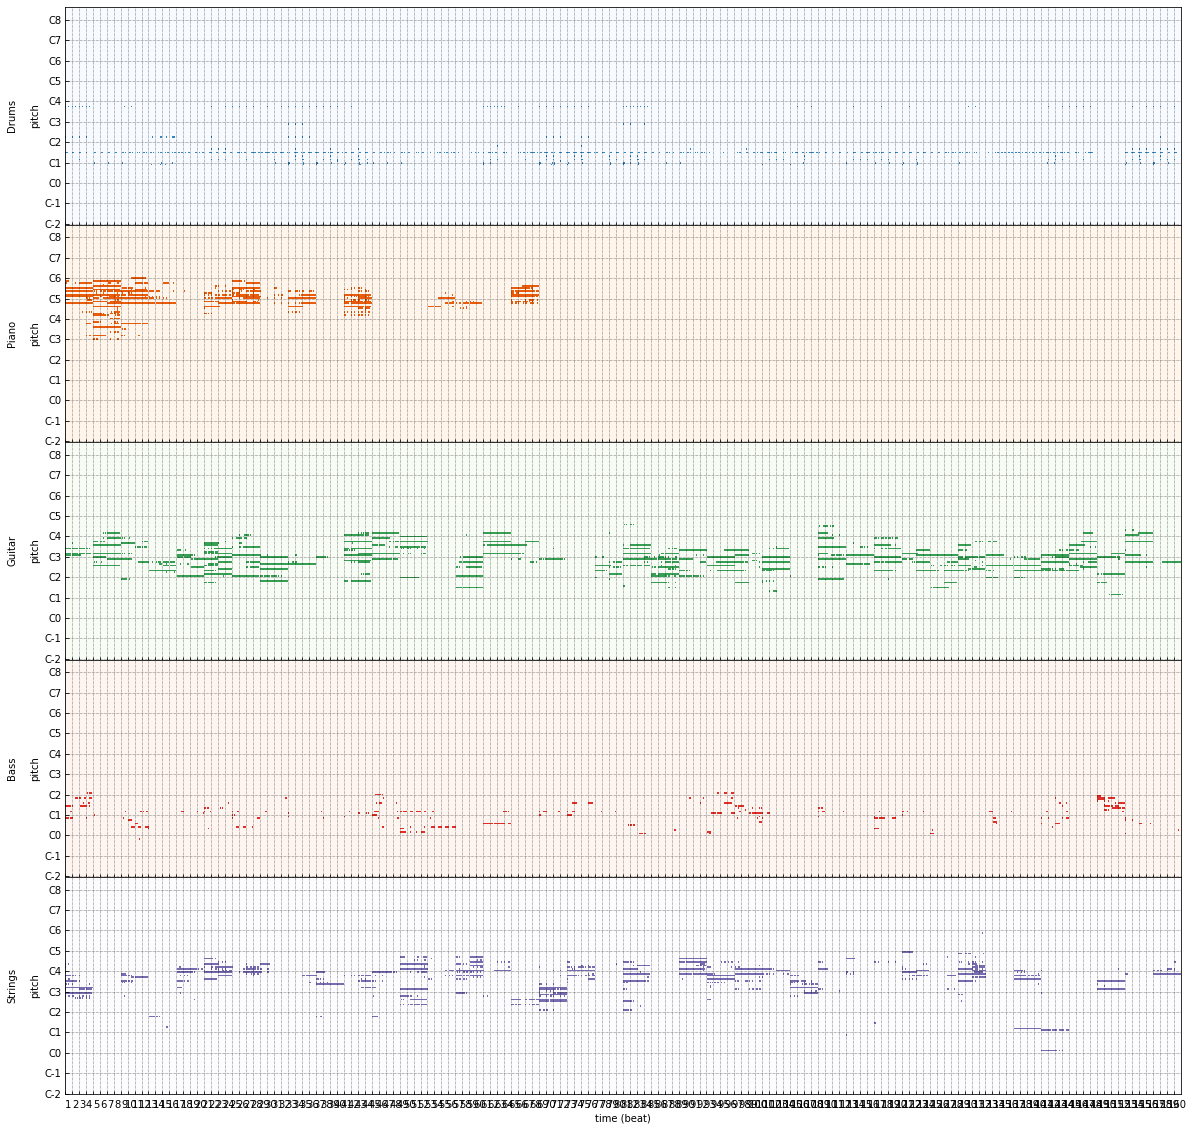

In [85]:
plt.rcParams["figure.figsize"] = (20,20)
generated_music.plot()

In [86]:
generated_music.write("final_music_2.mid")